In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost.dask import predict


In [3]:
df = pd.read_csv('heart.csv')
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [4]:
XGboosted = XGBClassifier()
XGboosted.fit(x_train, y_train)
y_pred = XGboosted.predict(x_test)
print(accuracy_score(y_test, y_pred))
#do the same for all imported algorithms
#lr = LogisticRegression()
#lr.fit(x_train, y_train)
#y_pred = lr.predict(x_test)
#print(accuracy_score(y_test, y_pred))

#rf = RandomForestClassifier()
#rf.fit(x_train, y_train)
#y_pred = rf.predict(x_test)
#print(accuracy_score(y_test, y_pred))

#svm = SVC()
#svm.fit(x_train, y_train)
#_pred = svm.predict(x_test)
#print(accuracy_score(y_test, y_pred))

#knn = KNeighborsClassifier()
#knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)
#print(accuracy_score(y_test, y_pred))

#gnb = GaussianNB()
#gnb.fit(x_train, y_train)
#y_pred = gnb.predict(x_test)
#print(accuracy_score(y_test, y_pred))

#dt = DecisionTreeClassifier()
#dt.fit(x_train, y_train)
#y_pred = dt.predict(x_test)
#print(accuracy_score(y_test, y_pred))





0.9853658536585366


In [5]:
new_data=pd.DataFrame({'age':53, 'sex':1, 'cp':0, 'trestbps':125, 'chol':212, 'fbs':0, 'restecg':1, 'thalach':168,
       'exang':0, 'oldpeak':1.0, 'slope':2, 'ca':2, 'thal':3
}, index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,0,125,212,0,1,168,0,1.0,2,2,3


In [6]:
p=XGboosted.predict(new_data)
if p==0:
    print('No Disease')
else:
    print('Diseased')

No Disease


In [7]:
#save the model
import joblib
joblib.dump(XGboosted, 'heart_model.pkl')

['heart_model.pkl']

In [8]:
model = joblib.load('heart_model.pkl')
prediction = model.predict(df.drop('target', axis=1))
prediction

array([0, 0, 0, ..., 0, 1, 0], shape=(1025,))

In [9]:
accuracy_score(df['target'], prediction)


0.9970731707317073

<Figure size 1000x1000 with 0 Axes>

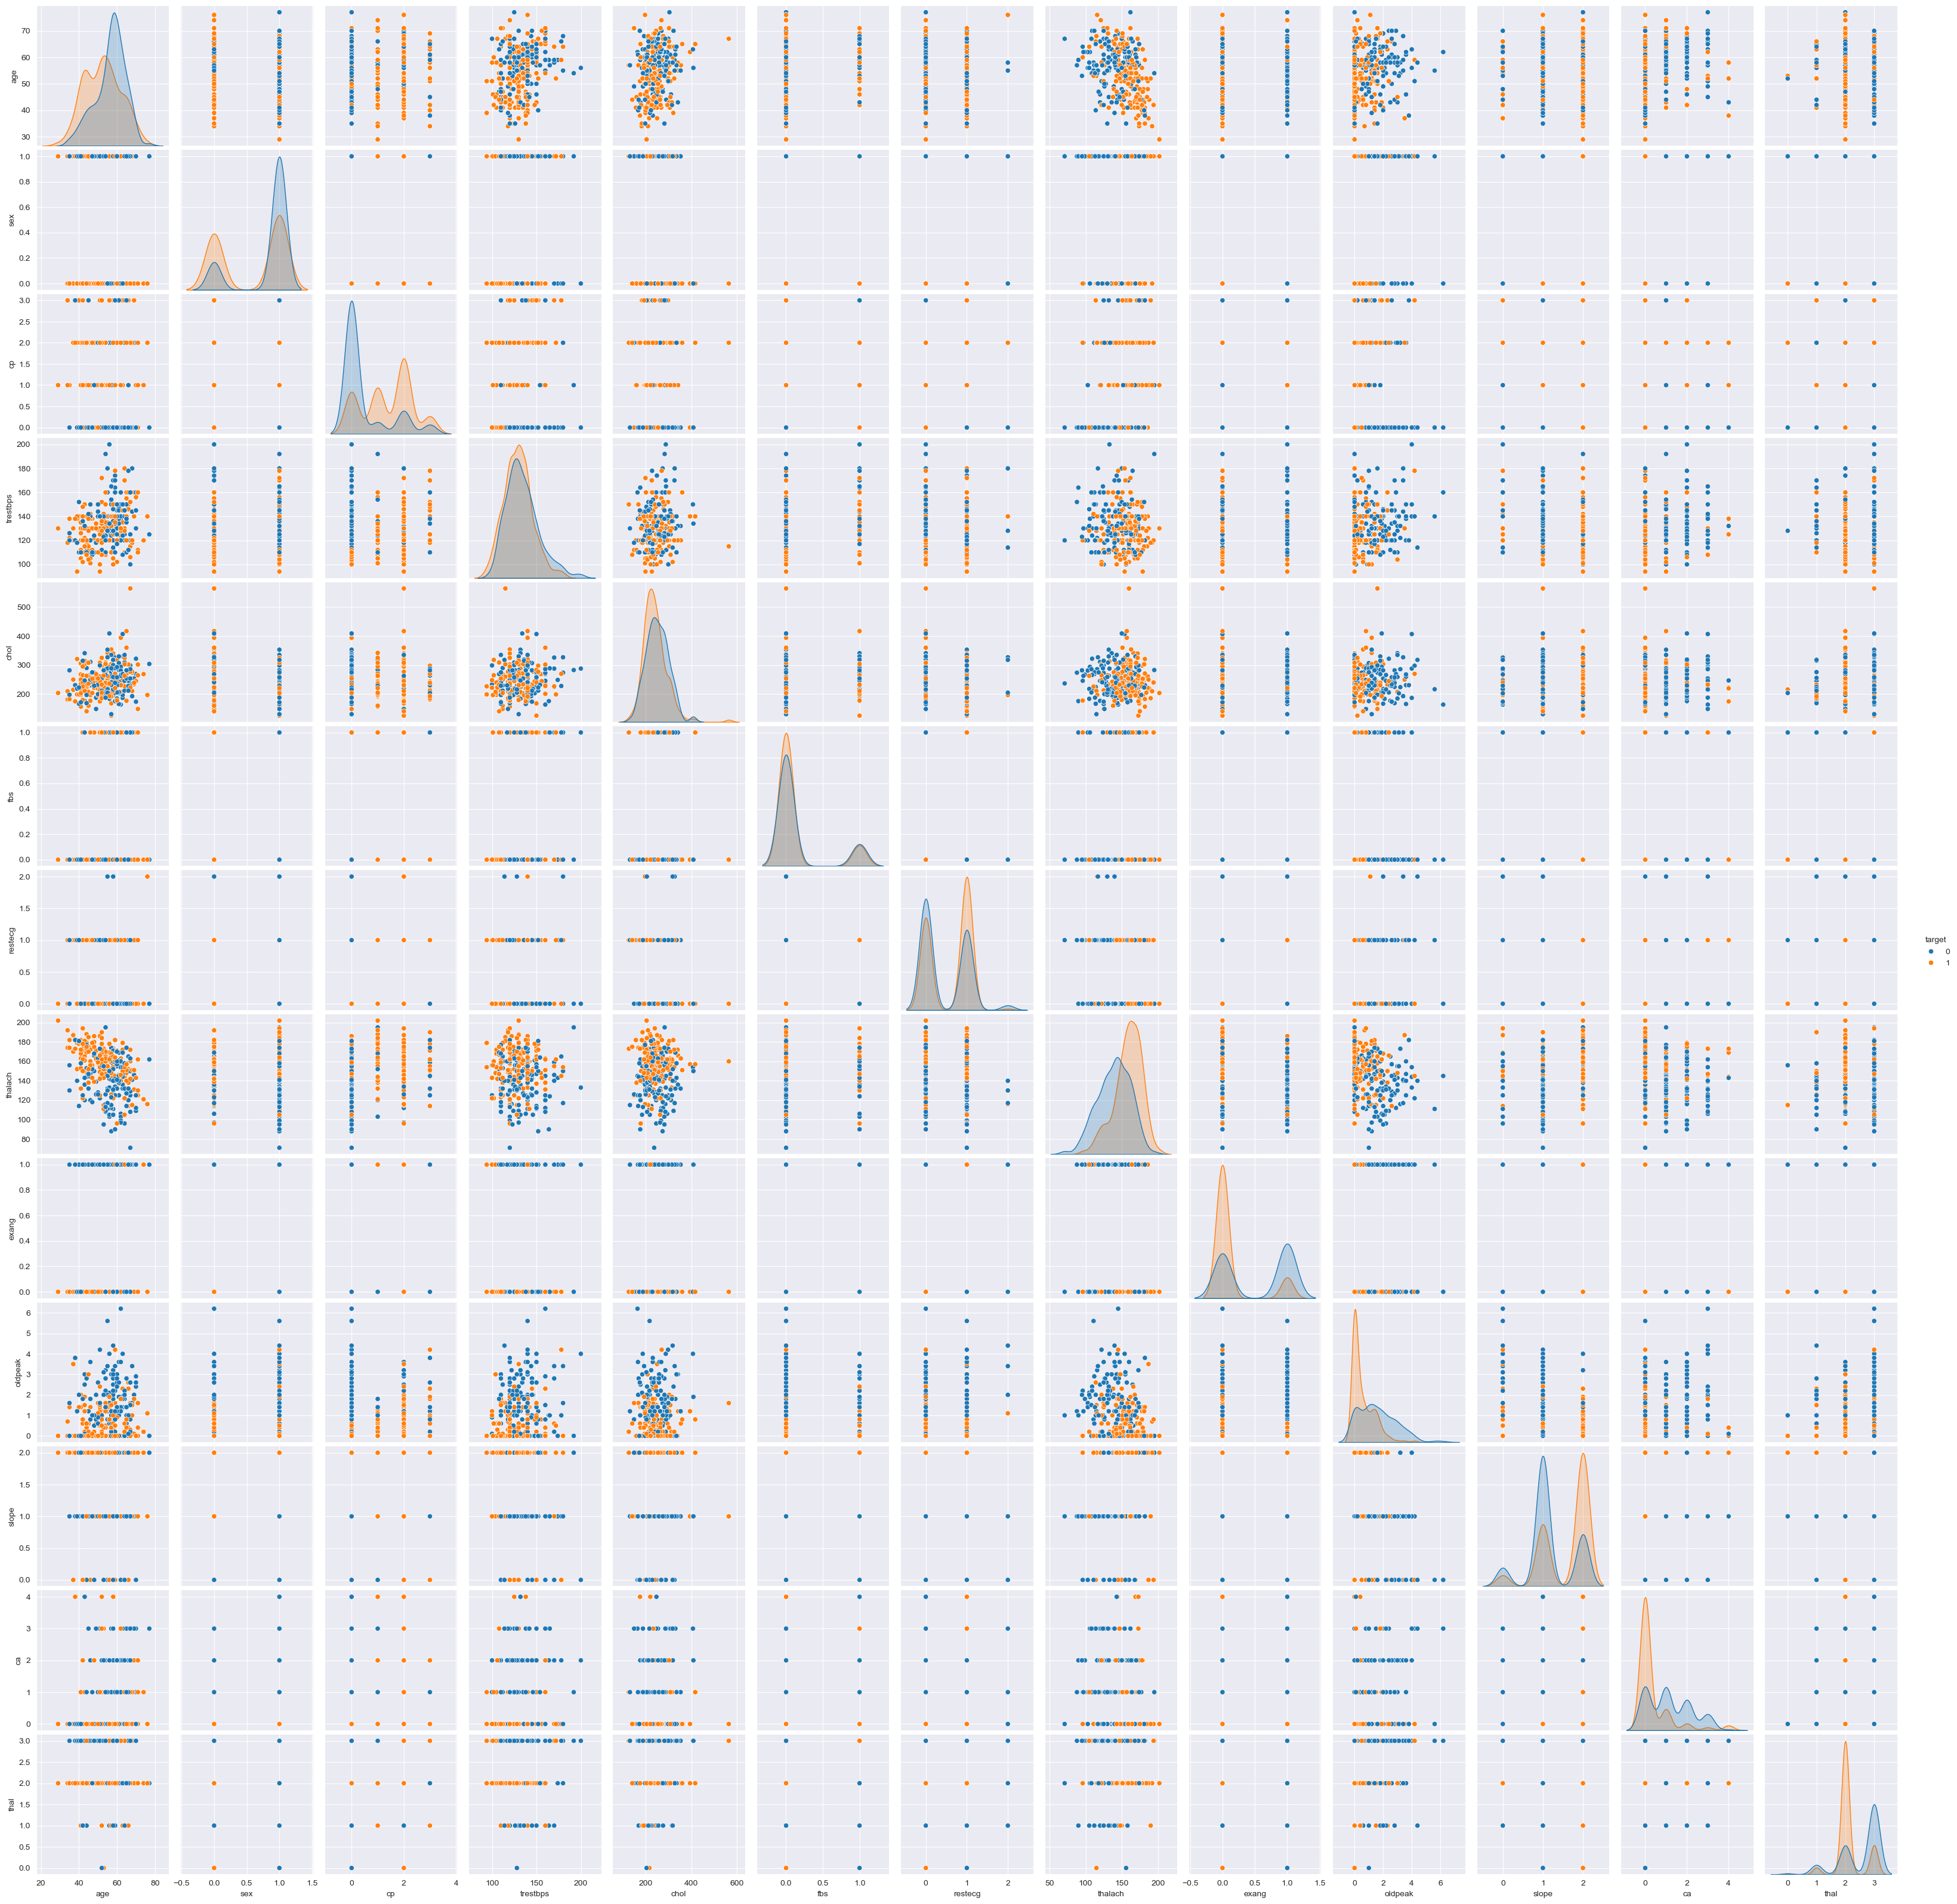

In [10]:
#EDA on the heart.csv dataset
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='target')
plt.show()

Text(0.5, 1.0, 'Correlation Analysis')

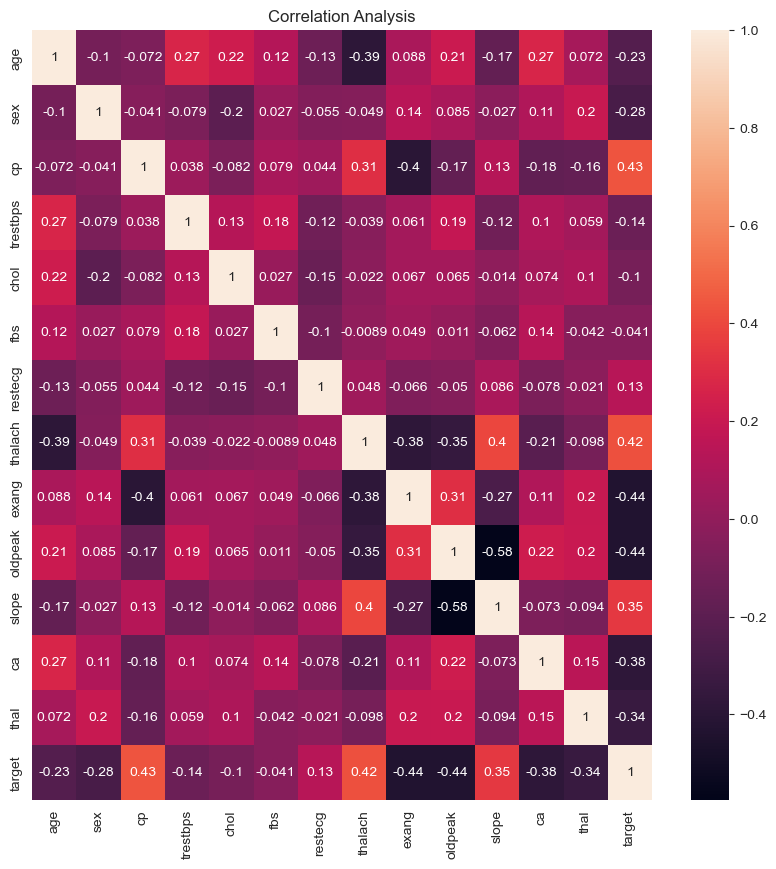

In [11]:
#Correlation Analysis on the dataset
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Analysis')

In [12]:
#do preprocessing for the same dataset
